In [1]:
from importlib import reload

import numpy as np

import sys

sys.path.append("..")
import Final_nn_classes as nn
import io_util

print(sys.version)


3.12.1 (main, Jul 10 2025, 11:57:50) [GCC 13.3.0]


In [2]:
reload(nn)
reload(io_util)

data = io_util.load_mnist("..", maximum=(5000, 10_000, 10_000))
print(data)


MnistDataSet
  train  -> X: (5000, 784) float32 | Y: (5000,) int64
  val    -> X: (10000, 784) float32 | Y: (10000,) int64
  test   -> X: (10000, 784) float32 | Y: (10000,) int64


In [3]:
reload(nn)
model = nn.FeedForwardNNWithLayers(
    [13],
    loss_fn=nn.MSELoss(),
    act_fn_hidden=nn.Sigmoid,
    act_fn_out=nn.Sigmoid,
)

print(model)

x_dummy = np.arange(784 * 2).reshape((2, -1)) / 2000
y_dummy = np.arange(10 * 2).reshape((2, -1)) / 2000
yhat = model.forward(x_dummy)

grad, loss = model.backprop(x_dummy, y_dummy)
grad[0][0].shape

FFN (10345 params)
  input: 784
  FFLayerSimple(13 nodes) f=Sigmoid
  FFLayerSimple(10 nodes) f=Sigmoid


(13, 784)

In [4]:
## It seems to learn something

reload(nn)

model = nn.FeedForwardNNWithLayers(
    [16],
    loss_fn=nn.MSELoss(),
    act_fn_hidden=nn.Sigmoid,
    act_fn_out=nn.Sigmoid,
)
# ReLu seems to work but needs lower LR!

print(model)

trainer = nn.Training(
    model,
    data,
    bs_train=64,
    start_lr=2,
    stop_patience=20,
)

metrics = trainer.run(max_iter=10, verbose=True)


FFN (12730 params)
  input: 784
  FFLayerSimple(16 nodes) f=Sigmoid
  FFLayerSimple(10 nodes) f=Sigmoid
Train DL: 5000 samples = 78 batches x 64
Val   DL: 10000 samples = 1 batches x 10000
epoch=   0 | loss_mean_train=0.0417 | loss_mean_val=0.0334 | samples/second 47874 | acc_val=56.8% | lr: 2
epoch=   1 | loss_mean_train=0.0274 | loss_mean_val=0.0225 | samples/second 42975 | acc_val=74.4% | lr: 2
epoch=   2 | loss_mean_train=0.0196 | loss_mean_val=0.0176 | samples/second 25657 | acc_val=83.4% | lr: 2
epoch=   3 | loss_mean_train=0.0161 | loss_mean_val=0.0147 | samples/second 26021 | acc_val=86.1% | lr: 2
epoch=   4 | loss_mean_train=0.0135 | loss_mean_val=0.0129 | samples/second 34068 | acc_val=87.4% | lr: 2
epoch=   5 | loss_mean_train=0.0118 | loss_mean_val=0.0116 | samples/second 41787 | acc_val=88.2% | lr: 2
epoch=   6 | loss_mean_train=0.0108 | loss_mean_val=0.0107 | samples/second 43422 | acc_val=88.9% | lr: 2
epoch=   7 | loss_mean_train=0.0091 | loss_mean_val=0.0102 | samples/

## Attack


epoch=   0 | loss_mean_train=0.0079 | loss_mean_val=0.0092 | samples/second 48561 | acc_val=89.8% | lr: 2
epoch=   1 | loss_mean_train=0.0079 | loss_mean_val=0.0089 | samples/second 46564 | acc_val=90.0% | lr: 2
epoch=   2 | loss_mean_train=0.0071 | loss_mean_val=0.0087 | samples/second 44617 | acc_val=89.9% | lr: 2
epoch=   3 | loss_mean_train=0.0071 | loss_mean_val=0.0085 | samples/second 41730 | acc_val=90.3% | lr: 2
epoch=   4 | loss_mean_train=0.0067 | loss_mean_val=0.0085 | samples/second 45331 | acc_val=90.2% | lr: 2


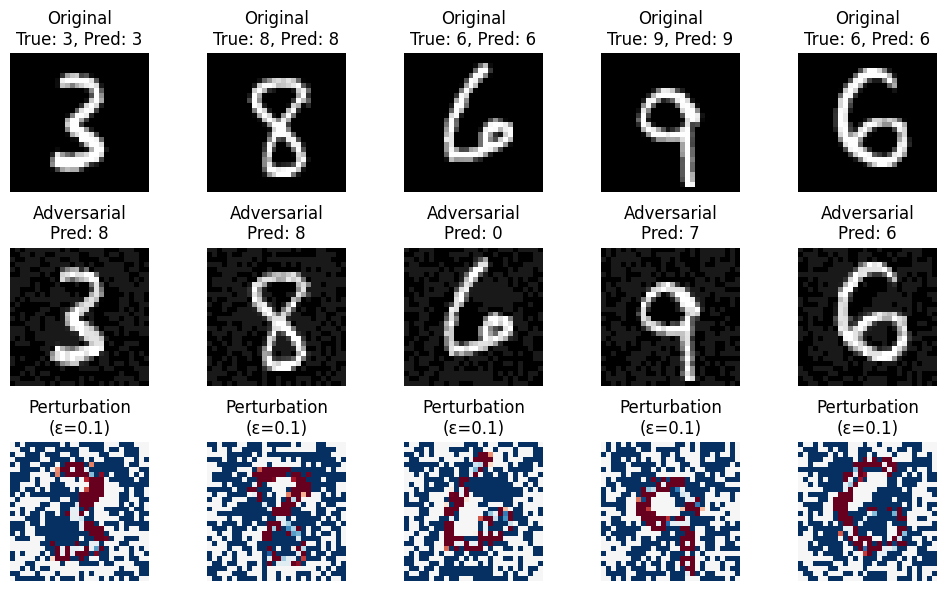

In [5]:
import attack_class

reload(attack_class)
metrics = trainer.run(max_iter=5, verbose=True)
dl_val = nn.DataLoader(data.val.X, data.val.Y, len(data.val))
attack = attack_class.NetworkAttack(model)
x_test, y_test = dl_val.get_batch(0)
attack.plot_attack_examples(x_test, y_test, epsilon=0.1, n_examples=5)

#### Task which were missing_Asifa


In [6]:
from Final_nn_classes import (
    FeedForwardNNWithLayers,
    Training,
    DataLoader,
    MSELoss,
    CrossEntropyLoss,
    Sigmoid,
    ReLU,
    Ident,
)

# required libraries
import numpy as np

print("All imports successful!")
print(f"FeedForwardNNWithLayers: {FeedForwardNNWithLayers}")

All imports successful!
FeedForwardNNWithLayers: <class 'Final_nn_classes.FeedForwardNNWithLayers'>


#### task 7: NetworkAttack (Simple FGSM)

pythonattacker = NetworkAttack(model)
success_rate = attacker.test_robustness(test_x, test_y)

fgsm_attack(): Changes pixels slightly to fool network
test_robustness(): Shows how many examples can be fooled


#### TASK 5a: ADVERSARIAL TRAINING

adv_trainer = AdversarialTraining(model)
adv_trainer.train_with_attacks(data, epochs=5)

train_with_attacks(): Trains on both clean and attacked images


=== Generating adversarial training data ===
Original training data: 5000 examples
Mixed training data: 10000 examples
Train DL: 10000 samples = 312 batches x 32
Val   DL: 10000 samples = 1 batches x 10000

=== Training with adversarial data ===
epoch=   0 | loss_mean_train=0.0758 | loss_mean_val=0.0570 | samples/second 29163 | acc_val=30.2% | lr: 0.01
epoch=   1 | loss_mean_train=0.0499 | loss_mean_val=0.0454 | samples/second 28064 | acc_val=44.3% | lr: 0.01
epoch=   2 | loss_mean_train=0.0425 | loss_mean_val=0.0397 | samples/second 25196 | acc_val=53.1% | lr: 0.01
epoch=   3 | loss_mean_train=0.0386 | loss_mean_val=0.0365 | samples/second 30608 | acc_val=58.5% | lr: 0.01
epoch=   4 | loss_mean_train=0.0363 | loss_mean_val=0.0345 | samples/second 28937 | acc_val=61.4% | lr: 0.01
epoch=   5 | loss_mean_train=0.0346 | loss_mean_val=0.0327 | samples/second 28098 | acc_val=64.8% | lr: 0.01
epoch=   6 | loss_mean_train=0.0329 | loss_mean_val=0.0315 | samples/second 29738 | acc_val=66.8% | 

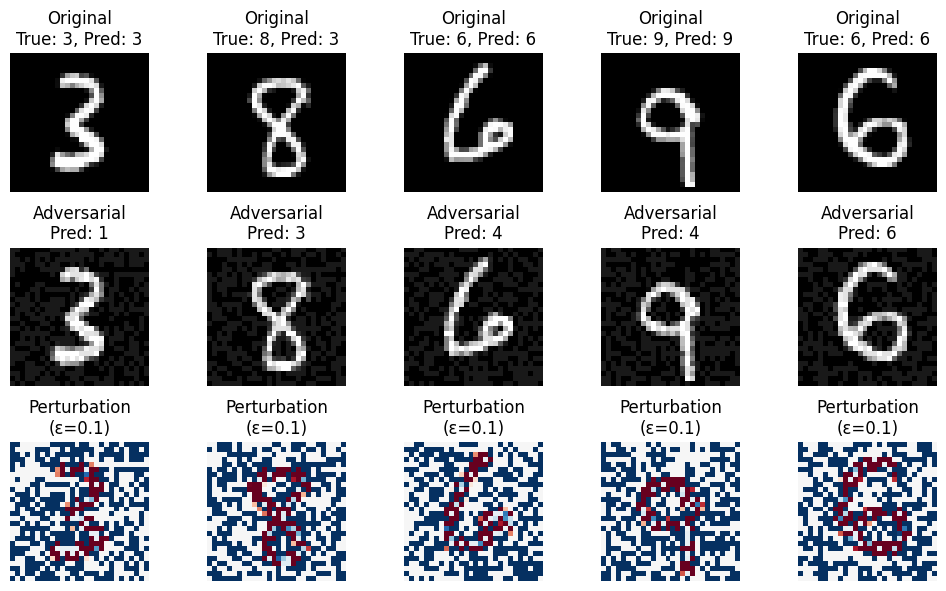

In [10]:
# Step 1: Generate adversarial examples for training data
print("=== Generating adversarial training data ===")
attack = attack_class.NetworkAttack(model)

# Get training data
X_train = data.train.X
Y_train = data.train.Y

# Convert labels to one-hot for attack
Y_onehot = np.zeros((len(Y_train), 10))
Y_onehot[np.arange(len(Y_train)), Y_train] = 1

# Generate adversarial examples
epsilon = 0.1
adversarial_X = attack.fgsm_attack(X_train, Y_onehot, epsilon)

# Step 2: Create mixed dataset (50% original, 50% adversarial)
mixed_X = np.vstack([X_train, adversarial_X])
mixed_Y = np.hstack([Y_train, Y_train])  # Same labels

print(f"Original training data: {len(X_train)} examples")
print(f"Mixed training data: {len(mixed_X)} examples")

# Step 3: Create new model and train with adversarial data
model_robust = nn.FeedForwardNNWithLayers(
    hidden_sizes=[30],
    d_in=784,
    d_out=10,
    loss_fn=nn.MSELoss(),
    act_fn_hidden=nn.Sigmoid,
    act_fn_out=nn.Ident,
    seed=42
)

# Create new dataset with adversarial examples
class AdversarialDataset:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

adv_data = type('', (), {})()
adv_data.train = AdversarialDataset(mixed_X, mixed_Y)
adv_data.val = data.val
adv_data.test = data.test

# Train with adversarial data
trainer_robust = nn.Training(model_robust, adv_data, bs_train=32, start_lr=0.01)
print("\n=== Training with adversarial data ===")
metrics_robust = trainer_robust.run(max_iter=15, verbose=True)

# Step 4: Compare robustness of original vs adversarially trained model
print("\n=== Testing Robustness Comparison ===")
attack_original = attack_class.NetworkAttack(model)  # Original model
attack_robust = attack_class.NetworkAttack(model_robust)  # Robust model

# Test on validation data
x_test, y_test = dl_val.get_batch(0)

print("Original model:")
original_success = attack_original.test_robustness(x_test, y_test, epsilon=0.1)

print("Adversarially trained model:")
robust_success = attack_robust.test_robustness(x_test, y_test, epsilon=0.1)

print(f"\nImprovement: {original_success - robust_success:.1%} reduction in attack success")

# Step 5: Try different attack on the robust model - PGD attack
class PGDAttack:
    def __init__(self, model):
        self.model = model
        self.basic_attack = attack_class.NetworkAttack(model)
    
    def pgd_attack(self, x, y, epsilon=0.1, alpha=0.01, num_iter=10):
        """Projected Gradient Descent - stronger than FGSM"""
        adversarial_x = x.copy()
        
        for i in range(num_iter):
            # Get gradient
            grad = self.basic_attack._input_gradient(adversarial_x, y)
            
            # Take step
            adversarial_x = adversarial_x + alpha * np.sign(grad)
            
            # Project back to epsilon ball
            perturbation = adversarial_x - x
            perturbation = np.clip(perturbation, -epsilon, epsilon)
            adversarial_x = np.clip(x + perturbation, 0, 1)
        
        return adversarial_x
    
    def test_pgd_robustness(self, x, y, epsilon=0.1):
        original_pred = np.argmax(self.model.forward(x), axis=1)
        adversarial_x = self.pgd_attack(x, y, epsilon)
        attacked_pred = np.argmax(self.model.forward(adversarial_x), axis=1)
        
        success_rate = np.mean(original_pred != attacked_pred)
        print(f"PGD Attack success rate: {success_rate:.1%}")
        return success_rate

# Test PGD attack on both models
print("\n=== Testing PGD Attack (stronger) ===")
pgd_original = PGDAttack(model)
pgd_robust = PGDAttack(model_robust)

print("PGD on original model:")
pgd_original.test_pgd_robustness(x_test, y_test, epsilon=0.1)

print("PGD on adversarially trained model:")
pgd_robust.test_pgd_robustness(x_test, y_test, epsilon=0.1)

# Visualize attacks on robust model
print("\n=== Visualizing attacks on robust model ===")
attack_robust.plot_attack_examples(x_test, y_test, epsilon=0.1, n_examples=5)

In [12]:
import hyper
# ========================================
# EXAMPLE USAGE
# =========================================


def demo_missing_components(model, data):
    """Quick demo of all missing components"""

    # 1. Test adversarial attacks
    print("=== ADVERSARIAL ATTACK TEST ===")
    attacker = attack_class.NetworkAttack(model)

    # Test on small batch
    xb, yb = DataLoader(data.test.X, data.test.Y, 100).get_batch(0)
    success_rate = attacker.test_robustness(xb, yb)

    # 2. Adversarial training
    print("\n=== ADVERSARIAL TRAINING ===")
    adv_trainer = AdversarialTraining(model)
    # adv_trainer.train_with_attacks(data, epochs=5)  # Uncomment to train

    # 3. Hyperparameter study
    print("\n=== HYPERPARAMETER STUDY ===")
    study = hyper.HyperparamStudy(data)

    # Test different architectures
    architectures = [[10], [30], [50], [30, 15]]
    arch_results = study.test_architecture(architectures)

    # Test different learning rates
    learning_rates = [0.01, 0.1, 0.5]
    lr_results = study.test_learning_rates(learning_rates)

    print("\n All missing components demonstrated!")

    return attacker, adv_trainer, study


"""
USAGE EXAMPLE:

# After training your model:
model = FeedForwardNNWithLayers([30])
# ... train model ...

# Use missing components:
attacker, adv_trainer, study = demo_missing_components(model, data)

# Individual usage:
# attacker.test_robustness(test_x, test_y)
# adv_trainer.train_with_attacks(data)  
# study.test_architecture([[20], [40], [20, 10]])
"""


'\nUSAGE EXAMPLE:\n\n# After training your model:\nmodel = FeedForwardNNWithLayers([30])\n# ... train model ...\n\n# Use missing components:\nattacker, adv_trainer, study = demo_missing_components(model, data)\n\n# Individual usage:\n# attacker.test_robustness(test_x, test_y)\n# adv_trainer.train_with_attacks(data)  \n# study.test_architecture([[20], [40], [20, 10]])\n'